## Import the needed libraries

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Pre-Processing

## Load the dataset

In [86]:
df = pd.read_csv("/content/drive/MyDrive/Learning/Python_for_Data_Science_and_Machine_Learning/Datas/Male_Female_Voice_Dataset/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Encoding

In [87]:
## Replceing the male female labels
gender_encoder = LabelEncoder()
df['label'] = gender_encoder.fit_transform(df['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## Finding correlations and Selecting Fetaures in second Dataframe

In [88]:
cor= df.corr()
cor_abs = abs(cor["label"])
selected_fetures= cor_abs[cor_abs > 0.3]
df_sec = df[selected_fetures.index]
df_sec.head()

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,label
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,1
1,0.066009,0.067310,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937,1
2,0.077316,0.083829,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706,1
3,0.151228,0.072111,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965,1
4,0.135120,0.079146,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398,1


## Any null values?

In [89]:
##Checking for Null values
print(df.isnull().sum())
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Total number of labels: 3168
Number of male: 0
Number of female: 0


## Data Seperating, and Standarization

---



In [90]:
X=df.iloc[:, :-1]
X_sec=df_sec.iloc[:, :-1]

## Encoding the male female string
y=df.iloc[:,-1]

## Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(X_sec)
X_sec = scaler.transform(X_sec)

## Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(X_sec, y, test_size=0.2, random_state=1)

# SVM

## Running SVM with default hyperparamters

In [91]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score for default parameters:')
print(metrics.accuracy_score(y_test,y_pred))

svc.fit(X_train_sec,y_train)
y_pred=svc.predict(X_test_sec)
print('Accuracy Score for default parameters with selected fetures:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for default parameters:
0.9763406940063092
Accuracy Score for default parameters with selected fetures:
0.9747634069400631


## Running SVM with different Kernels but with their default hyperparameters

In [92]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Linear:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score Polynomial:') #Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score Linear:
0.9779179810725552
Accuracy Score RBF:
0.9763406940063092
Accuracy Score Polynomial:
0.9589905362776026


**From the above analysis, we will investigate different hyperparameters for Linear and RBF kernels only, since Polynomial performance is worse than both.**

## Check the C hyperparameter in depth for the Linear Kernel

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

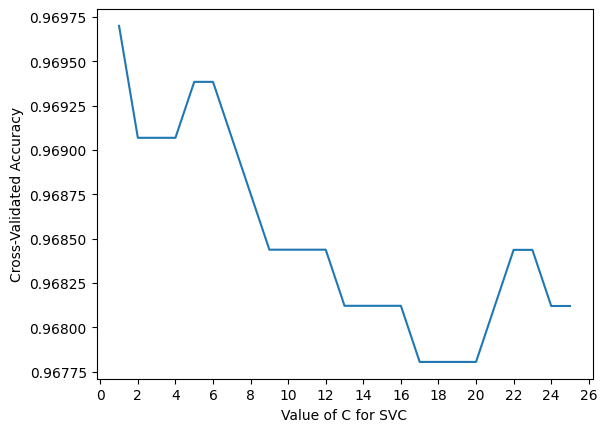

In [95]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.**



[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

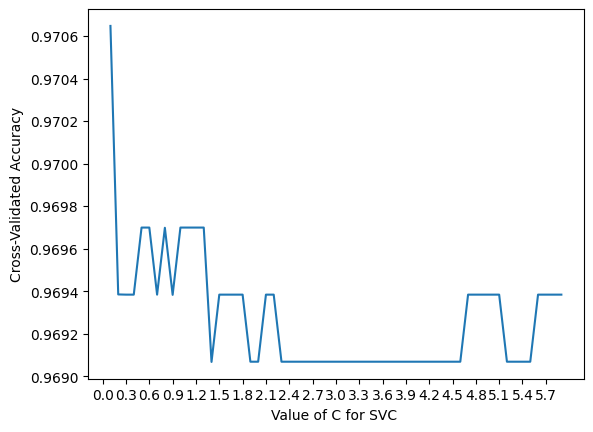

In [96]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Check The Gamma hyperparameter in RBF Kernel

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

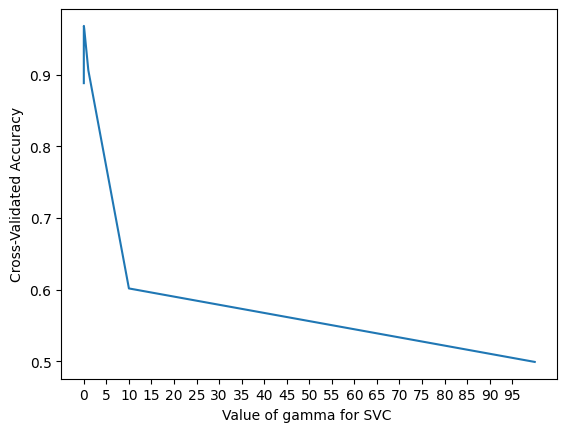

In [97]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

**We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight dip in accuracy score when gamma is 1.Let us look into more details for the range 0.0001 to 0.1.**



[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

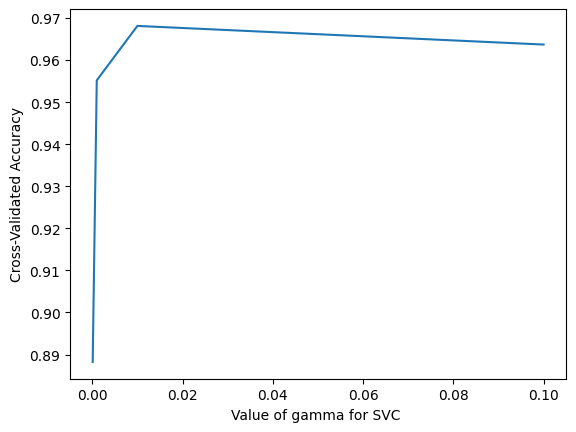

In [98]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.**

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

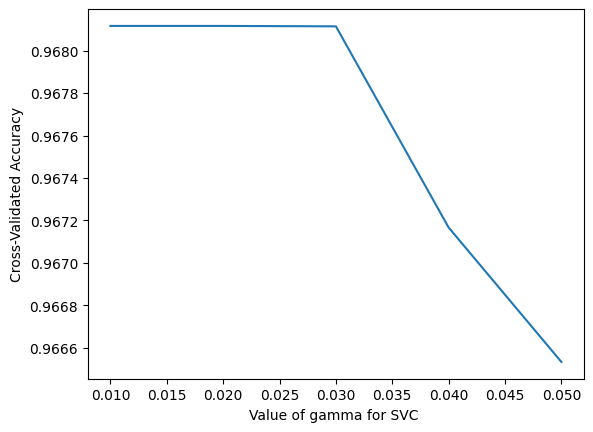

In [99]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## Grid Search

In [119]:
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],

     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(X_train, y_train)
print("Model for All Features")
print(model_svm.best_score_)
print(model_svm.best_params_)

#Tuning and Cross Validating Model for Selected features
model_svm_sec = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm_sec.fit(X_train_sec, y_train)
print("Model for Selected Features")
print(model_svm_sec.best_score_)
print(model_svm_sec.best_params_)

Model for All Features
0.9814556036226696
{'C': 0.9, 'gamma': 0.05, 'kernel': 'rbf'}
Model for Selected Features
0.9739550589773117
{'C': 0.9, 'gamma': 0.01, 'kernel': 'linear'}


In [120]:
#Testing for All Features
y_pred= model_svm.predict(X_test)
print("Accuracy Score for All Features:")
print(metrics.accuracy_score(y_pred,y_test))

##Tesitng for Selected Features
y_pred= model_svm_sec.predict(X_test_sec)
print('Accuracy Score for Selected Features:')
print(metrics.accuracy_score(y_pred,y_test))

Accuracy Score for All Features:
0.9779179810725552
Accuracy Score for Selected Features:
0.9605678233438486


# KNN

## Training on Default Parameters

In [104]:
##KNN
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy with All Features")
print(metrics.accuracy_score(y_pred,y_test))

knn.fit(X_train_sec,y_train)
y_pred=knn.predict(X_test_sec)
print("Accuracy with Selected Features Only")
print(metrics.accuracy_score(y_pred,y_test))

Accuracy with All Features
0.9652996845425867
Accuracy with Selected Features Only
0.9763406940063092


## Tuning main HyperParameter and Cross Validating

In [117]:
#Grid serach for best number of neighbors and Checking with cross validation to observe overfitting
tuned_parameters = {
    'n_neighbors': list(range(1,31,2))
}
knn_model= KNeighborsClassifier()

model_knn = GridSearchCV(knn_model, tuned_parameters,cv=10,scoring='accuracy')
model_knn.fit(X_train, y_train)
print("Model for All Features")
print(model_knn.best_score_)
print(model_knn.best_params_)

#Grid serach for best number of neighbors for selcted features and Checking with cross validation to observe overfitting
model_knn_sec = GridSearchCV(knn_model, tuned_parameters,cv=10,scoring='accuracy')
model_knn_sec.fit(X_train_sec, y_train)
print("Model for Selected Features")
print(model_knn_sec.best_score_)
print(model_knn_sec.best_params_)

Model for All Features
0.9747377921633313
{'n_neighbors': 3}
Model for Selected Features
0.9814509352338862
{'n_neighbors': 7}


In [118]:
y_pred= model_knn.predict(X_test)
print("Accuracy Score for All Features:")
print(metrics.accuracy_score(y_pred,y_test))

## Testing the same Paramters on Selected features
y_pred= model_knn_sec.predict(X_test_sec)
print('Accuracy Score for Selected Features:')
print(metrics.accuracy_score(y_pred,y_test))

Accuracy Score for All Features:
0.9716088328075709
Accuracy Score for Selected Features:
0.973186119873817


# Logistic Regression

## Training on default parameters

In [121]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print("Accuracy with All Features")
print(metrics.accuracy_score(y_pred,y_test))

#Testing
LR.fit(X_train_sec,y_train)
y_pred=LR.predict(X_test_sec)
print("Accuracy with Selected Features Only")
print(metrics.accuracy_score(y_pred,y_test))

Accuracy with All Features
0.9700315457413249
Accuracy with Selected Features Only
0.9637223974763407


## Tuning for C Hyper-Parameter

[0.9046639779579124, 0.9542317214391247, 0.9674889190592181, 0.9665415485365172, 0.9659086371441121, 0.9662240945573612]


Text(0, 0.5, 'Cross-Validated Accuracy')

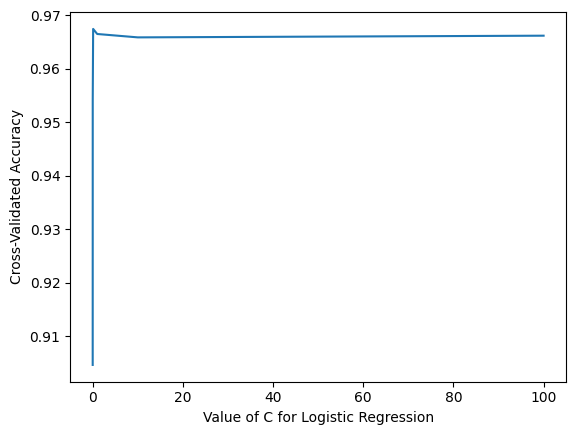

In [127]:
C_range=[0.001, 0.01, 0.1, 1, 10 , 100]
acc_score=[]
for c in C_range:
    LR = LogisticRegression(C=c)
    scores = cross_val_score(LR, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
plt.plot(C_range,acc_score)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')

**As we can see from above the accuracy maxes out at 0.1 and remainas constant after that so we will now see where will it maxnimize accuracy between 0.01 and 0.1**

## Grid Search and Training

In [133]:
tuned_parameters = {
    'C':  (np.arange(0.01,0.1,0.01))
}
LR_model= LogisticRegression()
model_LR = GridSearchCV(LR_model, tuned_parameters,cv=10,scoring='accuracy')
model_LR.fit(X_train, y_train)
print("Model for All Features")
print(model_LR.best_score_)
print(model_LR.best_params_)

#doing same for selected features
model_LR_sec = GridSearchCV(LR_model, tuned_parameters,cv=10,scoring='accuracy')
model_LR_sec.fit(X_train_sec, y_train)
print("Model for Selected Features")
print(model_LR_sec.best_score_)
print(model_LR_sec.best_params_)

Model for All Features
0.9707914475117487
{'C': 0.06999999999999999}
Model for Selected Features
0.9684354673057172
{'C': 0.060000000000000005}


In [134]:
y_pred= model_LR.predict(X_test)
print("Accuracy Score for All Features:")
print(metrics.accuracy_score(y_pred,y_test))

## Testing the same Paramters on Selected features
y_pred= model_LR_sec.predict(X_test_sec)
print('Accuracy Score for Selected Features:')
print(metrics.accuracy_score(y_pred,y_test))

Accuracy Score for All Features:
0.9652996845425867
Accuracy Score for Selected Features:
0.9605678233438486


# Conclusions

We got these accuracies for different model:

## Logistic Regression
All Features: 96.5%

Selected Features: 96%

## KNN
All Features: 97.1%

Selected Features: 97.3%

## SVM
All Features: 97.8%

Selected Features: 96%